👀 Vista previa del dataset:
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             

C:\Users\CELTI\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


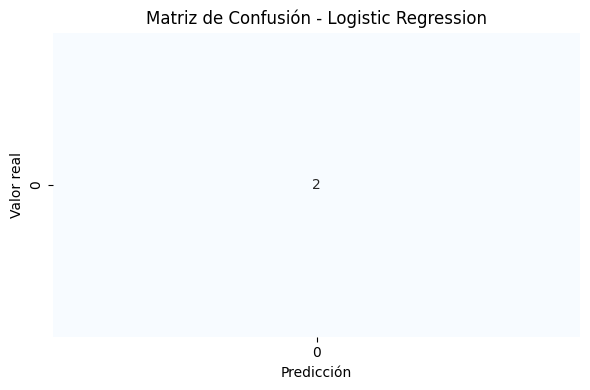

🔁 Cross-validation scores (LogReg): [0.66666667 1.        ]
📈 Media de CV: 0.8333

🌲 Random Forest - Accuracy: 1.0

🧾 Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



C:\Users\CELTI\AppData\Local\Temp\ipykernel_8584\502186419.py:86: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  plt.tight_layout()
C:\Users\CELTI\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


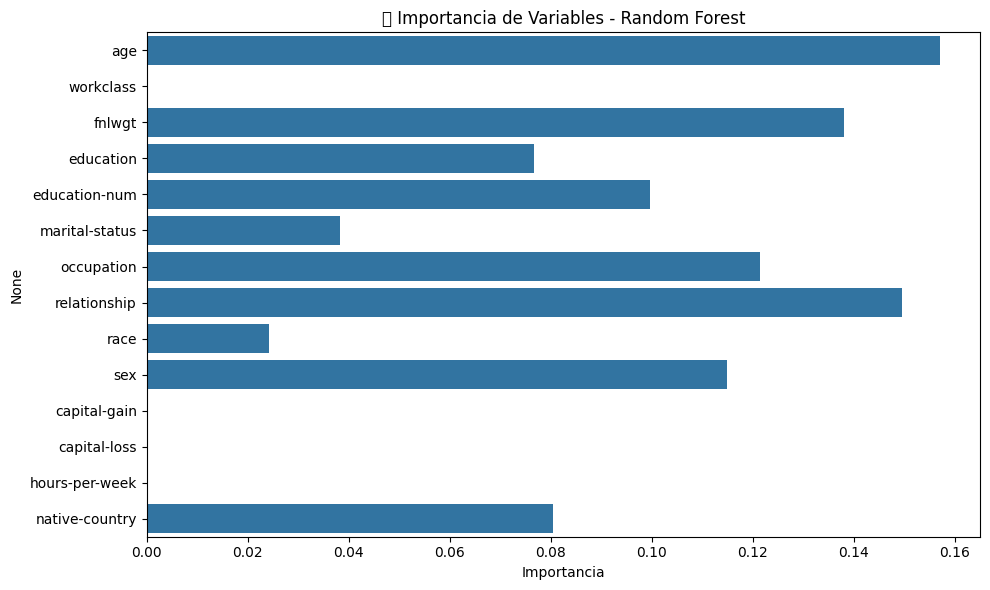

In [5]:
# Predicción de ingresos con LogisticRegression + mejoras sólidas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Cargar datos
df = pd.read_csv("adult.csv")
print("👀 Vista previa del dataset:")
print(df.head())

# 2. Limpiar datos (regex mejora la detección de '?')
df = df.replace(r'^\s*\?$', np.nan, regex=True)
df = df.dropna()
print(f"✅ Filas después de limpieza: {df.shape[0]}")
print(df['income'].value_counts())

# 3. Codificar variables categóricas
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# 4. Separar X e y
X = df.drop("income", axis=1)
y = df["income"]

# 5. División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Modelo: Regresión Logística
modelo = LogisticRegression(max_iter=200)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# 7. Métricas
print("\n📊 Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred))
print("\n🧾 Classification Report (LogReg):")
print(classification_report(y_test, y_pred))

# 8. Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusión - Logistic Regression")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.tight_layout()
plt.show()

# 9. 🔁 Validación cruzada segura
min_class = y.value_counts().min()
cv_folds = min(5, min_class)  # Ajusta a mínimo de la clase minoritaria

if cv_folds >= 2:
    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    scores = cross_val_score(modelo, X, y, cv=cv)
    print("🔁 Cross-validation scores (LogReg):", scores)
    print("📈 Media de CV:", round(scores.mean(), 4))
else:
    print("⚠️ No hay suficientes datos por clase para validación cruzada.")

# 10. 🌲 Modelo alternativo: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n🌲 Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\n🧾 Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# 11. 📌 Importancia de variables
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("📌 Importancia de Variables - Random Forest")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()


